In [19]:
import numpy as np
import pandas as pd
import seaborn as sns

In [20]:
res = pd.read_csv("../results_remote/output_places_US_knn_inc_vs_direct.csv")

name_map = {
    "fast_inc_NO": "Incremental",
    "fast_NO": "Direct",
    "fast_inc_deg_ratio_NO": "Incremental (on deg. ratio)"
}
res['name'] = res['name'].apply(lambda x: name_map[x])
res = res[~(res['name'] == "Incremental")]
res = res[~(res['num_queries'] == 100000)]
res

,name,creation_time,search_time,create_mem,search_mem,num_queries,num_objects,k
6,Direct,457658988,24064951163,0,0,500000,100000,5
7,Direct,905088823,57730267315,0,0,1000000,100000,5
8,Direct,2838479808,178506683232,0,0,2500000,100000,5
9,Direct,4786946352,412946659642,0,0,5000000,100000,5
11,Incremental (on deg. ratio),648599878,80266820213,0,0,500000,100000,5
12,Incremental (on deg. ratio),845562881,174633309089,0,0,1000000,100000,5
13,Incremental (on deg. ratio),2053888363,602878806961,0,0,2500000,100000,5
14,Incremental (on deg. ratio),4338244958,1359218987939,0,0,5000000,100000,5


/Users/udeshuk/Library/miniconda3/envs/fast/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/udeshuk/Library/miniconda3/envs/fast/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/udeshuk/Library/miniconda3/envs/fast/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/udeshuk/Library/miniconda3/envs/fast/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is depr

<Axes: xlabel='No. of queries', ylabel='Index creation time (sec)'>

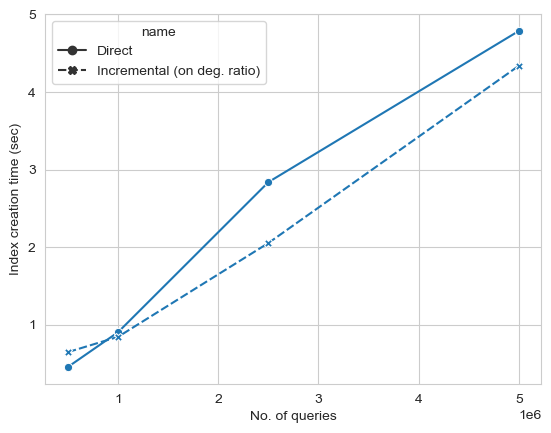

In [21]:
search_res = res.loc[:, ['creation_time', 'num_queries', 'name']]
search_res = search_res[search_res['num_queries'] > 10000]
search_res['Index creation time (sec)'] = search_res['creation_time'].apply(lambda x: x) / 1000000000
search_res = search_res.rename(columns={"num_queries": "No. of queries"})

sns.lineplot(x="No. of queries", y='Index creation time (sec)', style='name', data=search_res, errorbar=None, markers=True)

In [22]:
test = pd.DataFrame(res[res['num_queries'] == 500000])
test['search_time'] = test['search_time'].apply(lambda x: x / 500000)
test

,name,creation_time,search_time,create_mem,search_mem,num_queries,num_objects,k
6,Direct,457658988,48129.902326,0,0,500000,100000,5
11,Incremental (on deg. ratio),648599878,160533.640426,0,0,500000,100000,5


In [23]:
res[res['num_queries'] == 2500000]

,name,creation_time,search_time,create_mem,search_mem,num_queries,num_objects,k
8,Direct,2838479808,178506683232,0,0,2500000,100000,5
13,Incremental (on deg. ratio),2053888363,602878806961,0,0,2500000,100000,5


/Users/udeshuk/Library/miniconda3/envs/fast/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/udeshuk/Library/miniconda3/envs/fast/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/udeshuk/Library/miniconda3/envs/fast/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/udeshuk/Library/miniconda3/envs/fast/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is depr

<Axes: xlabel='No. of queries', ylabel='Query Matching Time (ms)'>

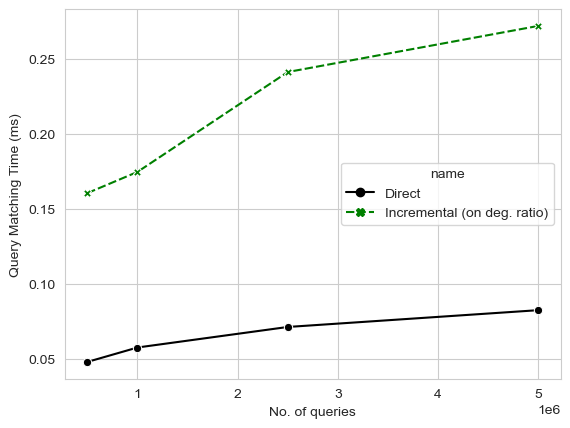

In [24]:
search_res = res.loc[:, ['search_time', 'num_queries', 'name']]
search_res['Query Matching Time (ms)'] = search_res['search_time'].apply(lambda x: x) / (search_res['num_queries'] * 1000000)
search_res = search_res.rename(columns={"num_queries": "No. of queries"})
# create_res['experiment'] = create_res['name'].apply(expName)

sns.lineplot(x="No. of queries", y='Query Matching Time (ms)', hue='name', style='name', data=search_res, errorbar='sd', palette=['black', 'g', 'r'], markers=True)

In [25]:
# Optimization
# - Custom iterator
# - Circle bound calculation